In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import fft
import seaborn as sns

In [330]:
df = pd.read_csv("D:\\UNIVERSITÁ\\TIME SERIES AND FORECASTING\\Challenge\\aus_cafe.csv", sep=';')

In [287]:
len(df)

180

In [288]:
df.head()

,Month,Turnover
0,2004 Jan,1895.1
1,2004 Feb,1765.7
2,2004 Mar,1872.8
3,2004 Apr,1873.7
4,2004 May,1846.0


In [289]:
training = df[:126]

In [290]:
testing = df[126:181]

In [291]:
len(training)

126

In [292]:
len(testing)

54

In [314]:
a = []
a = training['Turnover'].tolist()
t1 = training.index.tolist()
t1 = [int(item) for item in t1]
b = testing['Turnover'].tolist()
t2 = testing.index.tolist()
t2 = [int(item) for item in t2]

In [315]:
p1 = np.polyfit(t1, a, 1)
p1 = [float(item) for item in p1]

In [316]:
t1_corr = [item*p1[0] for item in t1]
a_notrand = []
for i in range(0, len(t1_corr)):
    a_notrand.append(a[i] - t1_corr[i])

In [317]:
a_freq = fft.fft(a_notrand)
f = fft.fftfreq(len(t1))
indexes = []
for i in range(len(t1)):
    indexes.append(i)
indexes.sort(key = lambda i: np.absolute(f[i]))

In [318]:
t = np.arange(0, len(t1) + len(t2))
segnale_giusto = np.zeros(len(t))

In [319]:
for i in indexes[:1 + 100 * 2]:
    ampli = np.absolute(a_freq[i]) / len(t1)   # amplitude
    fase = np.angle(a_freq[i])          # phase
    segnale_giusto += ampli * np.cos(np.pi * f[i] * t + fase)
tot = segnale_giusto + p1[0] * t

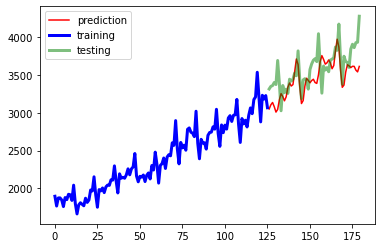

In [322]:
plt.plot(t2, tot[t2[0]:t2[-1]+1], 'r', label = 'prediction')
plt.plot(t1, a, 'b', label = 'training', linewidth = 3)
plt.plot(t2, b, 'g', label = 'testing', linewidth = 3, alpha =0.5)
plt.legend()
plt.show()

D:\Programmi\Anaconda\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


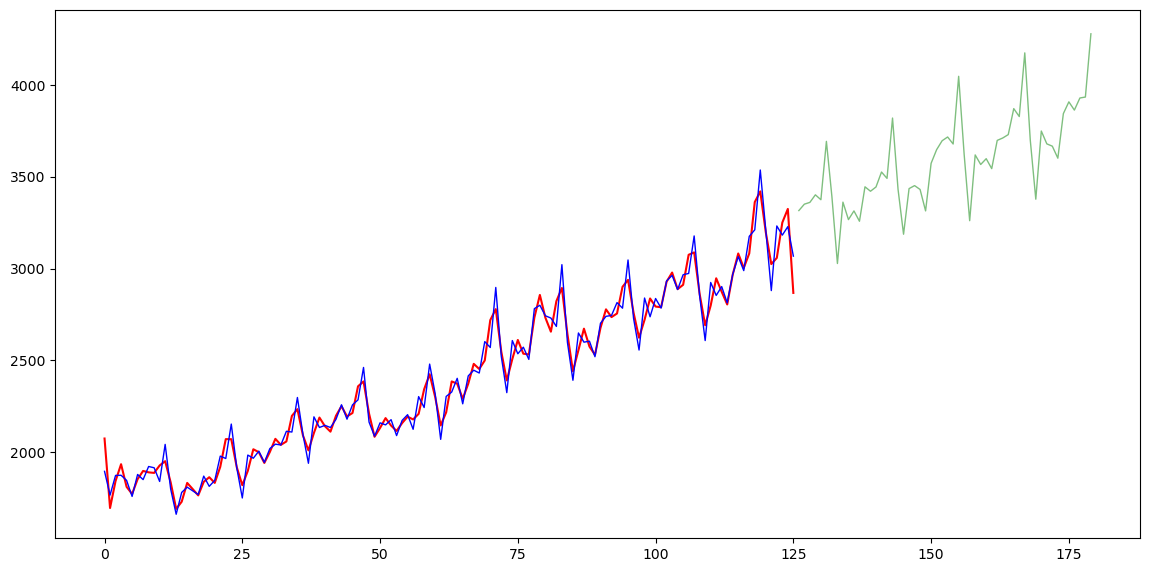

In [325]:
fft = np.fft.fft(a)
plt.figure(figsize=(14, 7), dpi=100)

for num_ in [40]:
    fft_list = np.copy(fft)
    fft_list[num_:-num_] = 0
    # Inverse Fast Fourier transform
    time = np.fft.ifft(fft_list)
    # The trend is your friend
    plt.plot(time, color = 'red')

plt.plot(t1, a, 'b', label = 'training', linewidth = 1)
plt.plot(t2, b, 'g', label = 'testing', linewidth = 1, alpha = 0.5)
plt.show()

In [326]:
model = FFT(required_matches=set(), nr_freqs_to_keep=None)
model.fit(a)
pred_val = model.predict(len(b))

NameError: name 'FFT' is not defined